<a href="https://colab.research.google.com/github/CarlosARossi/dataScienceCoder/blob/main/Visualizaci%C3%B3n%2BRossi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualizaciones en Python

## 1. Importación de librerias y datasets

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
url = 'https://raw.githubusercontent.com/CarlosARossi/dataScienceCoder/main/Datasets/Salary_Data_2022_REV15_2.csv'
salaries = pd.read_csv(url)
salaries.describe()

,ID,Years.of.Experience,Salary,Annual.Bonus,Annual.Average.of.RSUs,Signing.Bonus,Sick.Days,Office.Days,X
count,32570.00000,32053.000000,32570.000000,3.257000e+04,3.257000e+04,3.257000e+04,17703.000000,17964.000000,0.0
mean,16285.50000,4.321842,77056.813233,6.573224e+03,1.175429e+04,1.636194e+03,7.783255,3.779448,NaN
std,9402.29347,3.384184,46032.041714,8.961993e+04,1.607390e+06,1.195543e+04,13.232988,1.454159,NaN
min,1.00000,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,1.000000,NaN
25%,8143.25000,2.000000,50000.000000,0.000000e+00,0.000000e+00,0.000000e+00,3.000000,3.000000,NaN
50%,16285.50000,3.000000,69700.000000,0.000000e+00,0.000000e+00,0.000000e+00,6.000000,4.000000,NaN
75%,24427.75000,6.000000,93000.000000,4.000000e+03,0.000000e+00,0.000000e+00,10.000000,5.000000,NaN
max,32570.00000,19.000000,490000.000000,1.500000e+07,2.900394e+08,1.500000e+06,365.000000,7.000000,NaN


## 2. Gráficos con Matplotlib

### 1. Salarío promedio por puesto 
Average Salary by Job Title

---
Tipo de gráfico: **barchart**


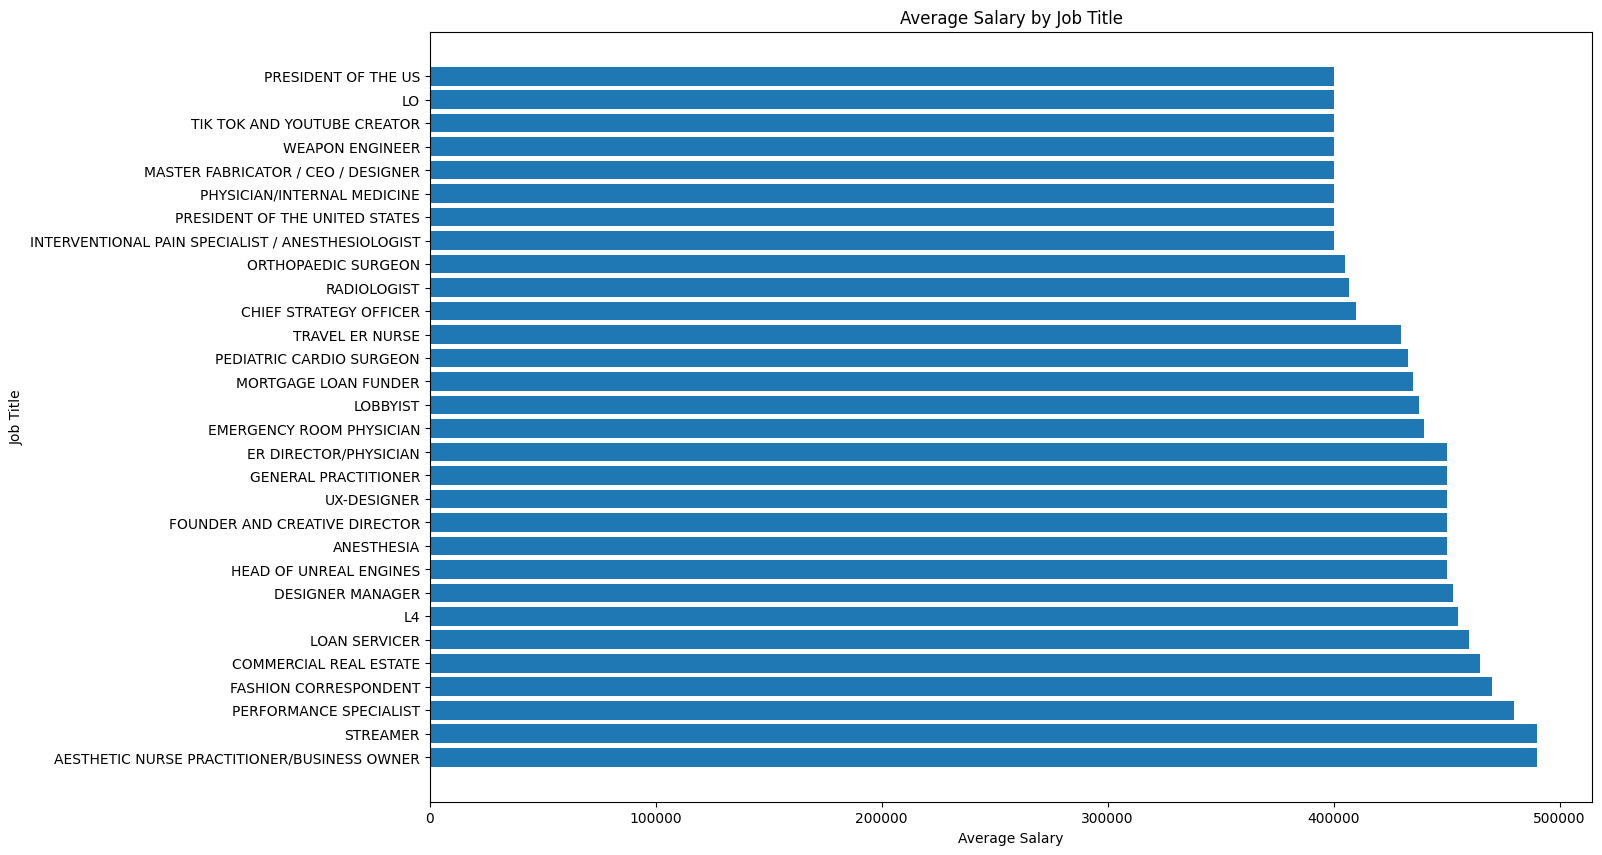

In [ ]:
plt.figure(figsize=(15,10))
mean_salaries = salaries.groupby('Job.Title')['Salary'].mean().reset_index()
mean_salaries = mean_salaries.sort_values('Salary', ascending=False).head(30)
plt.barh(mean_salaries['Job.Title'], mean_salaries['Salary'])
plt.xlabel('Average Salary')
plt.ylabel('Job Title')
plt.title('Average Salary by Job Title')
plt.show()

####Interpretación:
Se puede apreciar que dentro de los primeros 20 puestos con el salario promedio más alto, hay una mayor representación del sector de IT y médico.

### 2. Distribución salarial por edad 
Salary by Age Range

---
Tipo de gráfico: **boxplot**


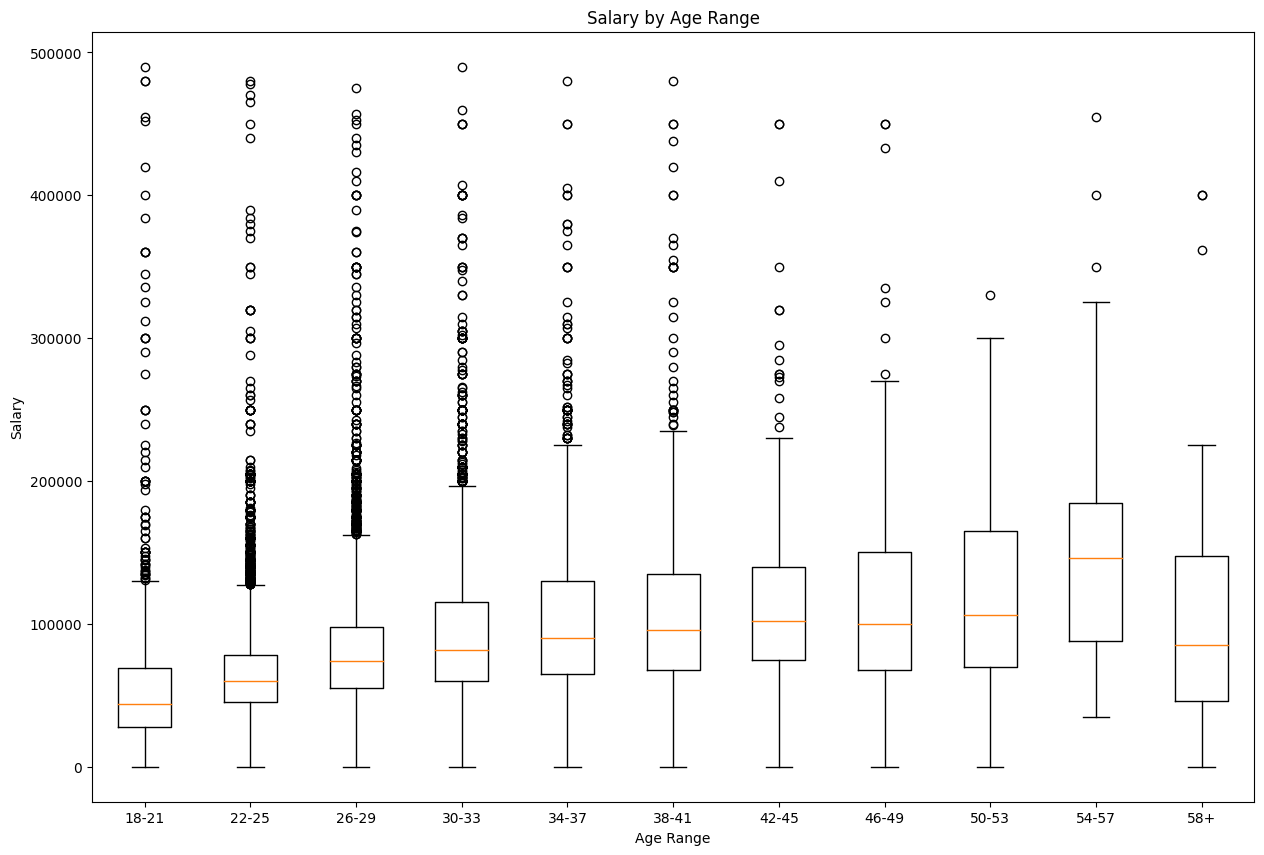

In [ ]:
plt.figure(figsize=(15,10))
plt.boxplot([salaries.loc[salaries['Age.Range'] == '18-21', 'Salary'],
             salaries.loc[salaries['Age.Range'] == '22-25', 'Salary'],
             salaries.loc[salaries['Age.Range'] == '26-29', 'Salary'],
             salaries.loc[salaries['Age.Range'] == '30-33', 'Salary'],
             salaries.loc[salaries['Age.Range'] == '34-37', 'Salary'],
             salaries.loc[salaries['Age.Range'] == '38-41', 'Salary'],
             salaries.loc[salaries['Age.Range'] == '42-45', 'Salary'],
             salaries.loc[salaries['Age.Range'] == '46-49', 'Salary'],
             salaries.loc[salaries['Age.Range'] == '50-53', 'Salary'],
             salaries.loc[salaries['Age.Range'] == '54-57', 'Salary'],
             salaries.loc[salaries['Age.Range'] == '58+', 'Salary']],
             labels=['18-21', '22-25', '26-29', '30-33','34-37','38-41','42-45','46-49','50-53','54-57', '58+'])
plt.xlabel('Age Range')
plt.ylabel('Salary')
plt.title('Salary by Age Range')
plt.show()

####Interpretación:
A medida que el rango etario va aumentando, es común encontrar menos cantidad de personas activas laboralmente y con una media salarial mayor. 

###3. Salario promedio por años de experiencia y género
Average Salary by Years of Experience and Gender

---
Tipo de gráfico: **plot**



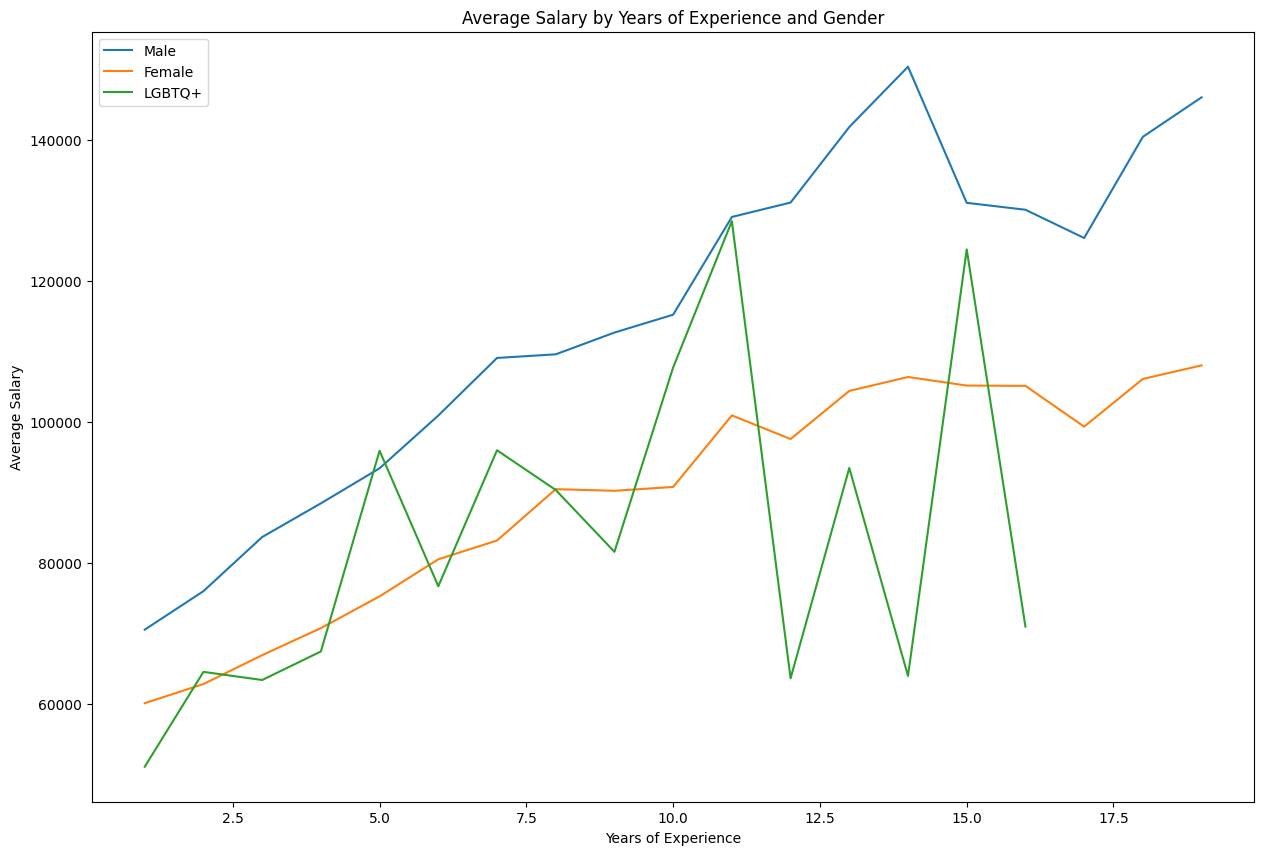

In [ ]:
male_salaries = salaries[salaries['Gender'] == 'Male']
female_salaries = salaries[salaries['Gender'] == 'Female']
lgbtq_salaries = salaries[salaries['Gender'] == 'LGBTQ+']

plt.figure(figsize=(15,10))
plt.plot(male_salaries.groupby('Years.of.Experience')['Salary'].mean(), label='Male')
plt.plot(female_salaries.groupby('Years.of.Experience')['Salary'].mean(), label='Female')
plt.plot(lgbtq_salaries.groupby('Years.of.Experience')['Salary'].mean(), label='LGBTQ+')
plt.xlabel('Years of Experience')
plt.ylabel('Average Salary')
plt.title('Average Salary by Years of Experience and Gender')
plt.legend()
plt.show()

####Interpretación:
A medida que los años de experiencia aumentan, tambíen lo hace la media salarial. Además, los hombres tienen un salario mayor que las mujeres y comunidad LGBTQ+ a igual cantidad de años de experiencia. 

##3. Gráficos con Seaborn

###1. Distribución salarial por genero
Salary distribution by gender

---
Tipo de gráfico: **histplot**

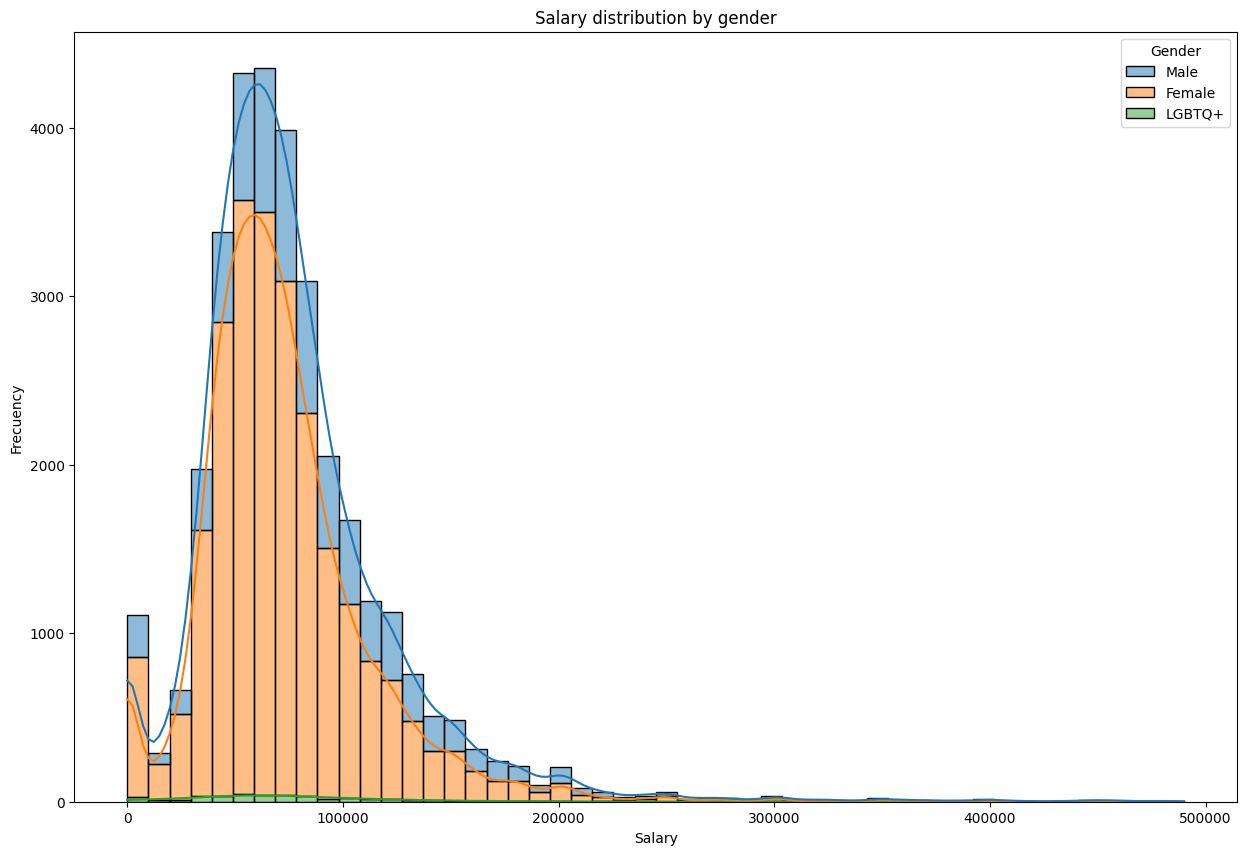

In [ ]:
plt.figure(figsize=(15, 10))
sns.histplot(data=salaries, x="Salary", hue="Gender", multiple="stack", kde=True, bins=50)
plt.xlabel('Salary')
plt.ylabel('Frecuency')
plt.title('Salary distribution by gender')
plt.show()

####Interpretación:
Se puede observar que la mayoría de los salarios se concentran en la parte inferior de la distribución, lo que indica que la mayoría de las personas ganan un salario bajo. Además, se nota que en promedio, los hombres tienen un salario mayor que las mujeres y la comunidad LGBTQ+.

### 2. Salario promedio por nivel de educación
Average salary by education level

---
Tipo de gráfico: **lineplot**

Text(0.5, 1.0, 'Average salary by education level')

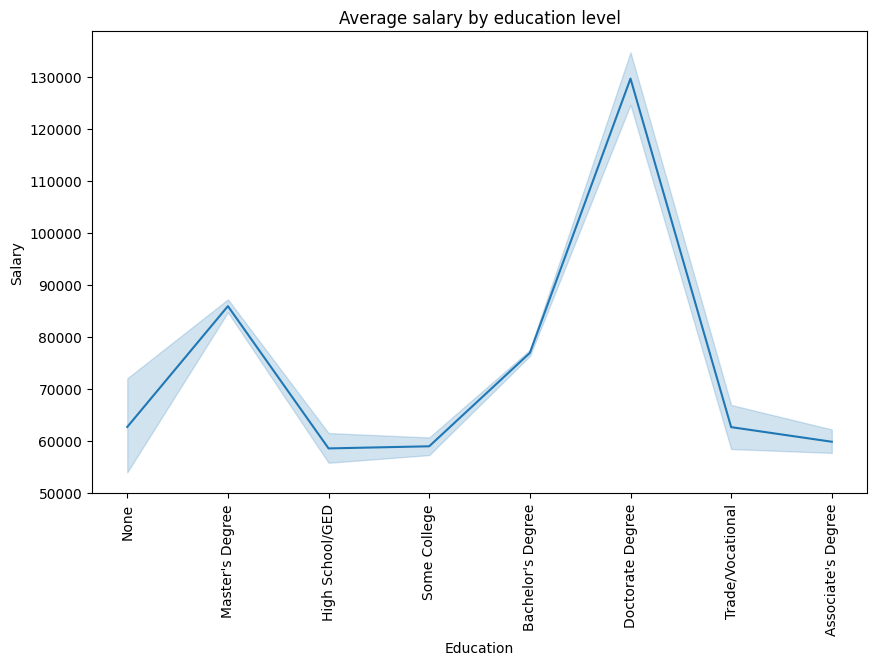

In [ ]:
plt.figure(figsize=(10,6))
sns.lineplot(data=salaries, x='Education', y='Salary', estimator='mean')
plt.xlabel('Education')
plt.xticks(rotation=90)
plt.ylabel('Salary')
plt.title('Average salary by education level')

####Interpretación:
El gráfico muestra que el nivel de educación está positivamente relacionado con el salario. Las personas con educación avanzada, como maestría o doctorado, tienen un salario promedio más alto que las personas con educación básica.




### 3. Salario promedio por país
Average Salary by Country

---
Tipo de gráfico: **barplot**

Text(0.5, 1.0, 'Average Salary by Country')

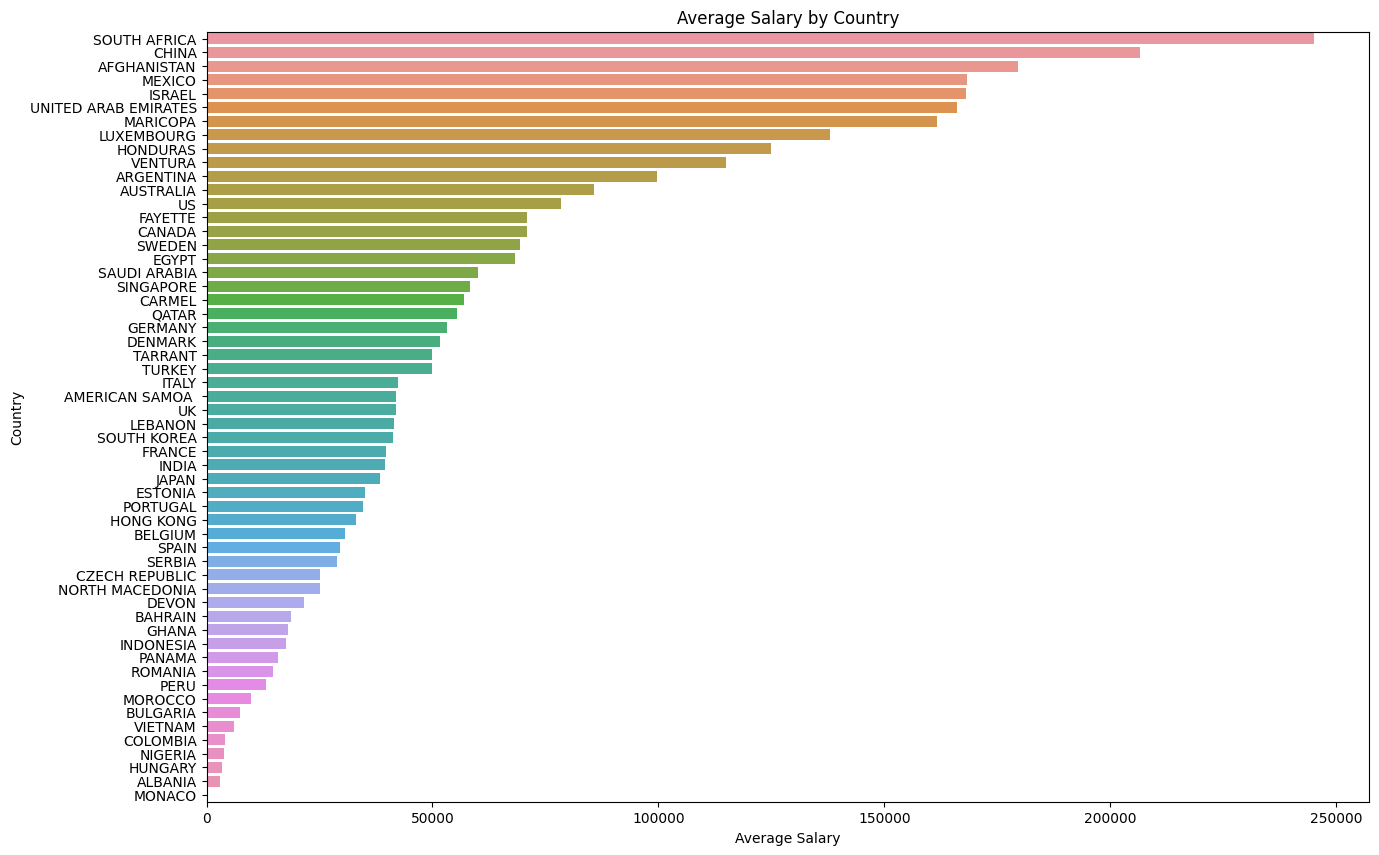

In [ ]:
salaries_by_country = salaries.groupby('Country')['Salary'].mean().reset_index()
salaries_by_country = salaries_by_country.sort_values(by='Salary', ascending=False)

plt.figure(figsize=(15,10))
sns.barplot(data=salaries_by_country, x='Salary', y='Country')
plt.xlabel('Average Salary')
plt.ylabel('Country')
plt.title('Average Salary by Country')


####Interpretación:
El gráfico muestra el salario promedio que se gana por país. Si lo comparamos con otras [fuentes](https://es.wikipedia.org/wiki/Anexo:Pa%C3%ADses_seg%C3%BAn_el_salario_medio), nos damos cuentas que puede haber valores erroneos en el dataset que generen una dispersión del promedio. 

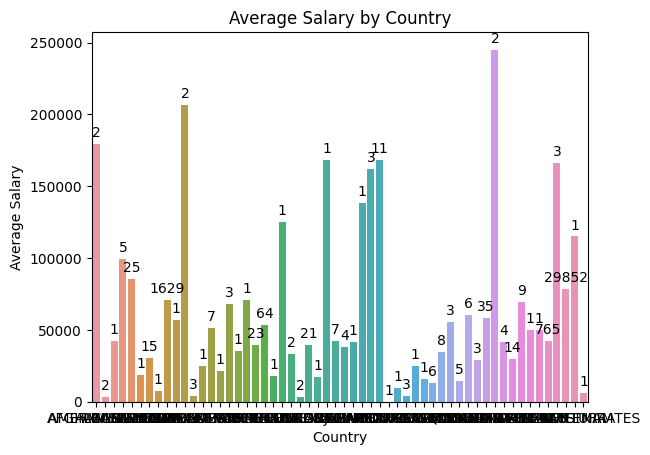

In [ ]:
# Agrupar por país y calcular el salario promedio y el conteo de valores
avg_salary_by_country = salaries.groupby('Country')['Salary'].agg(['mean', 'count']).reset_index()

# Graficar el salario promedio por país con Seaborn
sns.barplot(x='Country', y='mean', data=avg_salary_by_country)

# Añadir etiquetas y título
plt.xlabel('Country')
plt.ylabel('Average Salary')
plt.title('Average Salary by Country')

# Añadir valores de conteo de datos encima de cada barra
for index, row in avg_salary_by_country.iterrows():
    plt.text(index, row['mean']+5000, row['count'], ha='center')

# Mostrar el gráfico
plt.show()

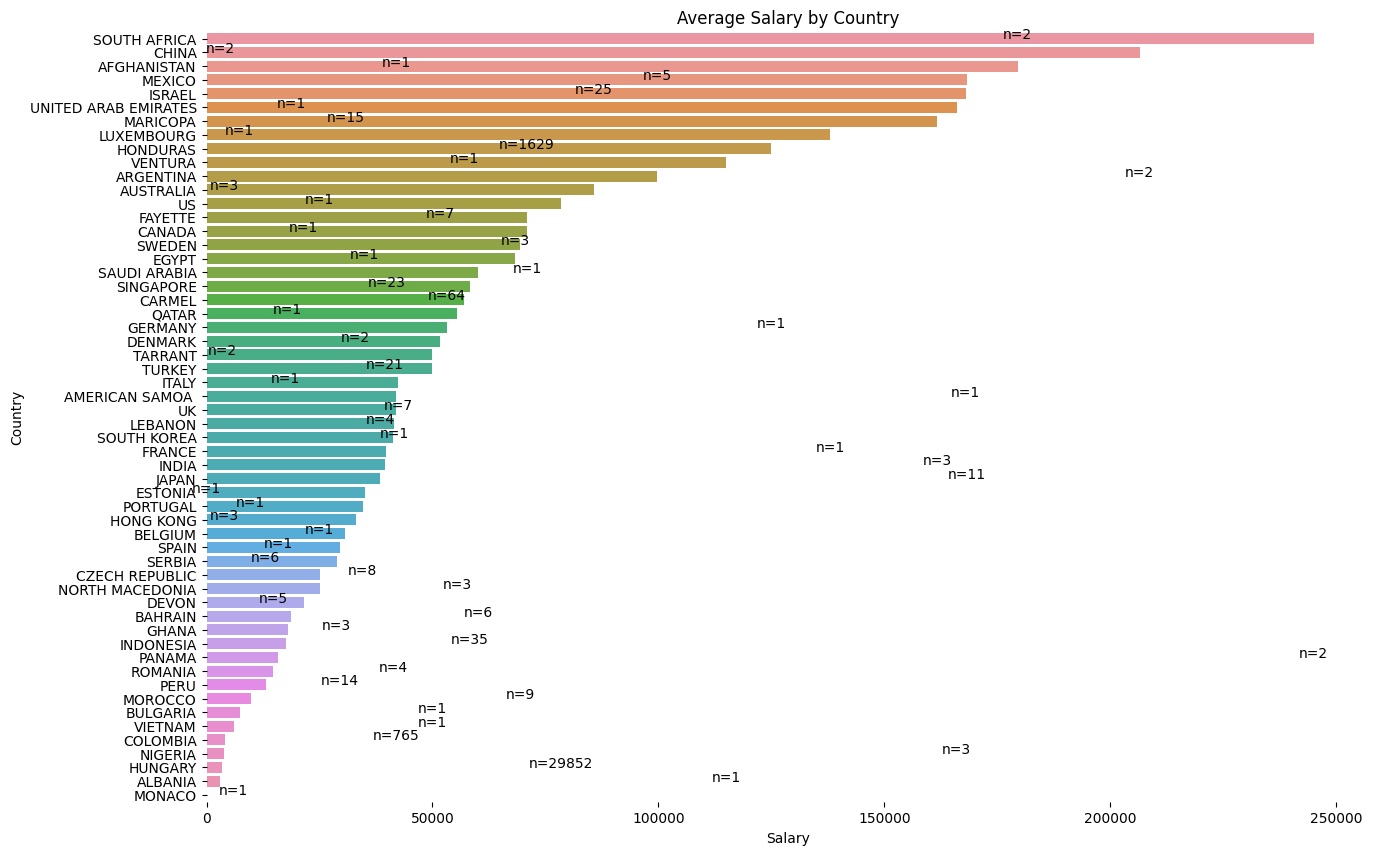

In [ ]:
# Agrupamos por país y calculamos el promedio del salario
salaries_by_country = salaries.groupby('Country')['Salary'].mean().reset_index().sort_values('Salary', ascending=False)

# Creamos el gráfico de barras
plt.figure(figsize=(15,10))
sns.barplot(x='Salary', y='Country', data=salaries_by_country, order=salaries_by_country['Country'])
sns.despine(left=True, bottom=True)

# Añadimos el número de valores tomados para cada promedio
for i, row in salaries_by_country.iterrows():
    plt.text(row['Salary'], i, f"n={salaries[salaries['Country']==row['Country']]['Salary'].count()}", ha='center')

plt.xlabel('Salary')
plt.ylabel('Country')
plt.title('Average Salary by Country')
plt.show()

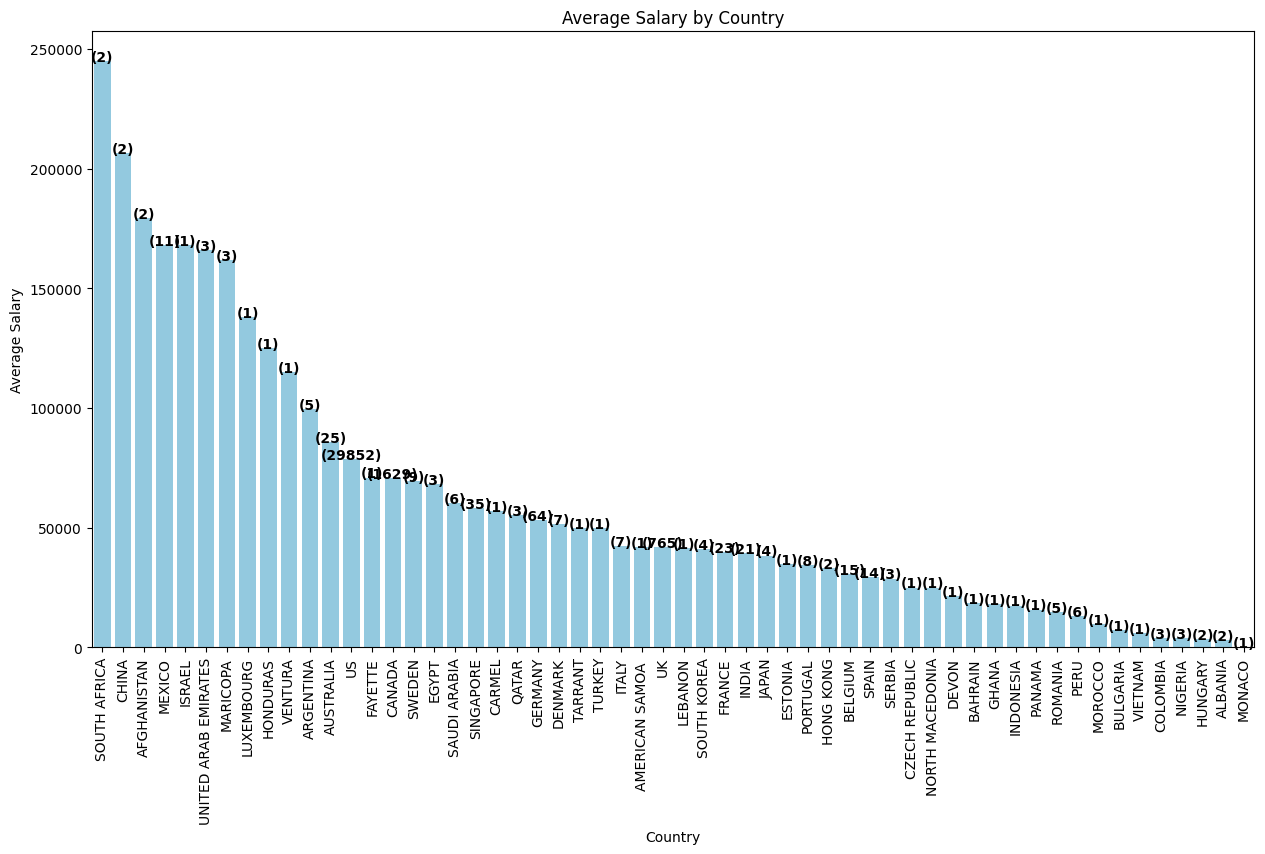

In [ ]:
avg_salary_by_country = salaries.groupby('Country')['Salary'].mean().sort_values(ascending=False)
count_by_country = salaries['Country'].value_counts()

fig, ax = plt.subplots(figsize=(15, 8))

sns.barplot(x=avg_salary_by_country.index, y=avg_salary_by_country.values, color='skyblue', ax=ax, order=avg_salary_by_country.index)
plt.xticks(rotation=90)

for i, v in enumerate(avg_salary_by_country):
    ax.text(i, v, f"\n({count_by_country[avg_salary_by_country.index[i]]})", ha='center', fontweight='bold')

plt.xlabel('Country')
plt.ylabel('Average Salary')
plt.title('Average Salary by Country')

plt.show()

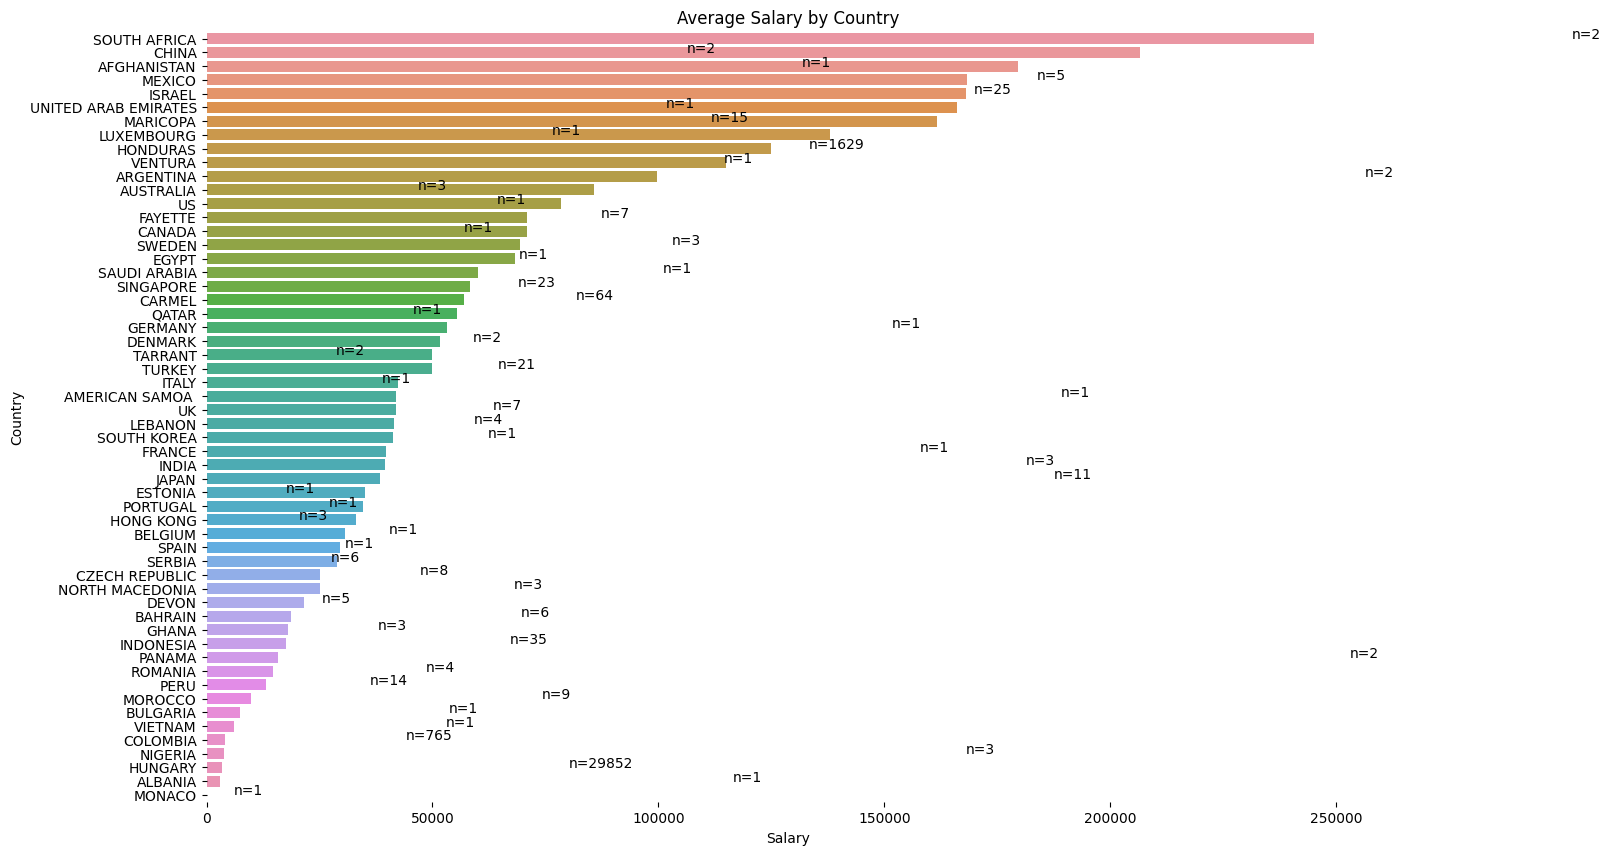

In [ ]:
# Agrupamos por país y calculamos el promedio del salario
salaries_by_country = salaries.groupby('Country')['Salary'].mean().reset_index().sort_values('Salary', ascending=False)

# Creamos el gráfico de barras
plt.figure(figsize=(15,10))
ax = sns.barplot(x='Salary', y='Country', data=salaries_by_country, order=salaries_by_country['Country'])
sns.despine(left=True, bottom=True)

# Añadimos el número de valores tomados para cada promedio
for i, row in salaries_by_country.iterrows():
    x_pos = row['Salary'] + ax.containers[0].patches[i].get_width()/2
    plt.text(x_pos, i, f"n={salaries[salaries['Country']==row['Country']]['Salary'].count()}")

plt.xlabel('Salary')
plt.ylabel('Country')
plt.title('Average Salary by Country')
plt.show()

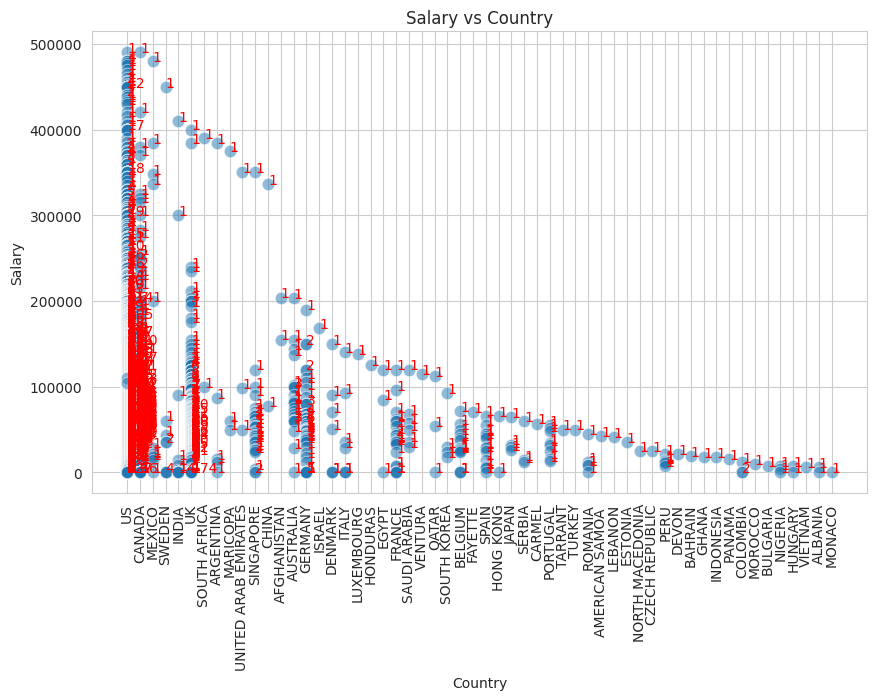

In [ ]:
# Crear gráfico de dispersión
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Country", y="Salary", data=salaries, s=80, alpha=0.5)

# Añadir conteo
count = salaries.groupby(['Country', 'Salary']).size().reset_index(name='Count')
for i, row in count.iterrows():
    plt.text(row['Country'], row['Salary'], s=row['Count'], color='red')

# Personalizar gráfico
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Salary')
plt.title('Salary vs Country')
plt.show()